In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale the values
4. Train test split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [8]:
import matplotlib.pyplot as plt


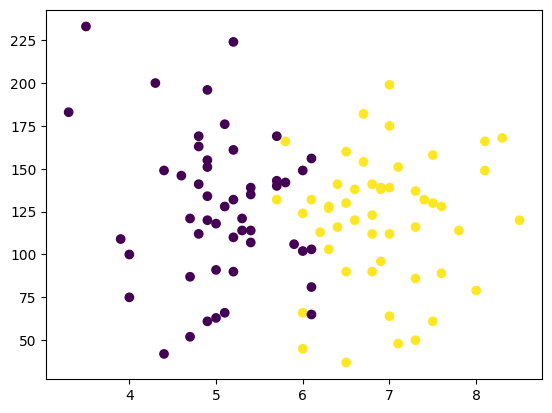

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y.shape

(100,)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train

,cgpa,iq
10,6.0,45.0
67,5.0,118.0
59,4.8,112.0
2,5.3,121.0
89,4.9,151.0
...,...,...
12,5.4,139.0
35,6.8,90.0
25,5.0,91.0
71,6.1,132.0


In [15]:
y_train

10    1
67    0
59    0
2     0
89    0
     ..
12    0
35    1
25    0
71    1
77    1
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,iq
31,3.9,109.0
75,4.8,169.0
98,6.3,103.0
7,5.0,63.0
29,7.0,112.0
55,7.8,114.0
32,7.0,139.0
68,4.0,75.0
88,4.4,149.0
45,6.0,66.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[-0.0290595 , -1.99836807],
       [-0.93090612, -0.17713375],
       [-1.11127544, -0.32682424],
       [-0.66035213, -0.1022885 ],
       [-1.02109078,  0.64616396],
       [-0.0290595 ,  0.59626713],
       [-1.20146011, -1.82372916],
       [-0.29961349,  0.37173139],
       [ 1.8648184 ,  0.59626713],
       [-1.11127544,  0.94554494],
       [ 0.06112516, -0.55135998],
       [ 0.42186381,  0.87069969],
       [ 0.06112516,  0.77090603],
       [-0.29961349,  0.17214407],
       [ 0.24149448,  0.04740199],
       [ 0.06112516, -1.49939976],
       [ 0.78260245,  0.34678297],
       [-0.57016747, -0.45156632],
       [ 0.96297178, -1.92352282],
       [-0.29961349,  1.09523543],
       [-1.02109078,  0.2220409 ],
       [ 0.60223313,  1.41956483],
       [ 0.33167914, -0.22703058],
       [ 1.8648184 ,  1.02039019],
       [ 0.33167914,  0.3966798 ],
       [ 0.87278712, -1.52434818],
       [ 2.04518772,  1.07028702],
       [ 0.15130982, -0.30187583],
       [-2.28367605,

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[-1.9229374 , -0.40166949],
       [-1.11127544,  1.09523543],
       [ 0.24149448, -0.55135998],
       [-0.93090612, -1.54929659],
       [ 0.87278712, -0.32682424],
       [ 1.59426441, -0.27692741],
       [ 0.87278712,  0.34678297],
       [-1.83275274, -1.24991561],
       [-1.47201409,  0.59626713],
       [-0.0290595 , -1.47445134]])

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
clf.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

31    0
75    0
98    1
7     0
29    1
55    1
32    1
68    0
88    0
45    1
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.9

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

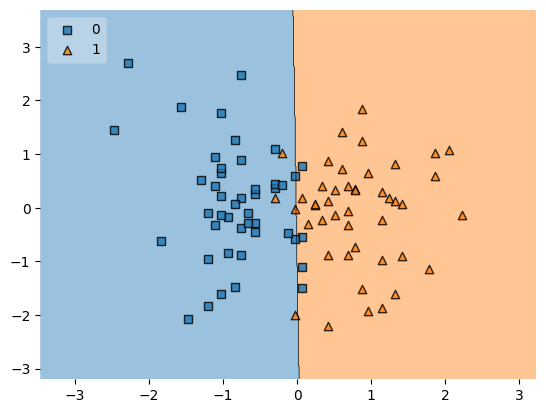

In [31]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))